# **BÙI KHÁNH VĨNH - 2010091 - Low and High Pass Filter**

# **MOUNT DRIVE AND INSTALL PACKAGE**

*   Mục danh sách
*   Mục danh sách



In [ ]:
from google.colab import drive
drive.mount('/content/drive');

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/CV-assignment/Project2

/content/drive/MyDrive/CV-assignment/Project2


# **IMPORT LIBRARIES**

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# **LOAD IMAGE**

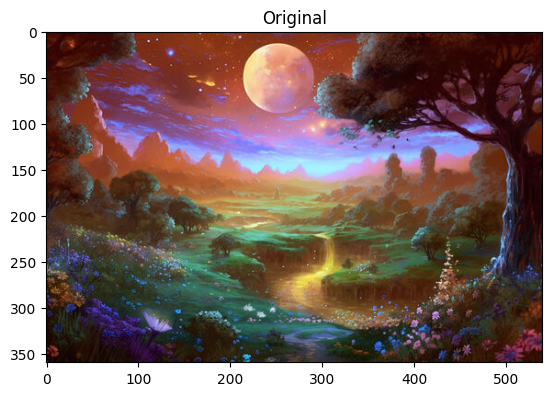

In [ ]:
input_image = cv2.imread('image.png') #Load Image
plt.imshow(input_image),plt.title('Original')
plt.imshow(input_image)
plt.show()

# **1) Low Pass Filter:**


A low pass filter is the basis for most smoothing methods. An image is smoothed by decreasing the disparity between pixel values by averaging nearby pixels. Using a low pass filter tends to retain the low frequency information within an image while reducing the high frequency information. An example of a low pass filter is an array of ones divided by the number of elements within the kernel, such as the following 3 by 3 kernel:
$$\frac{1}{9}\begin{bmatrix}
1&1&1\\
1&1&1\\
1&1&1\\\end{bmatrix}$$

## 1.1) Averaging

This is done by convolving an image with a normalized box filter. It simply takes the average of all the pixels under the kernel area and replaces the central element. A $6 \times 6$ normalized box filter would look like the below:
$$\frac{1}{6 \times 6}\begin{bmatrix}
1&1&1&1&1&1\\
1&1&1&1&1&1\\
1&1&1&1&1&1\\
1&1&1&1&1&1\\
1&1&1&1&1&1\\
1&1&1&1&1&1\\\end{bmatrix}$$
Here's the syntax: <code> blurred_image = cv2.blur(image, (kernel_size_x, kernel_size_y))
</code>


*   image: The input image.
*   (kernel_size_x, kernel_size_y): The size of the kernel (width, height). It defines the size of the neighborhood for computing the average.

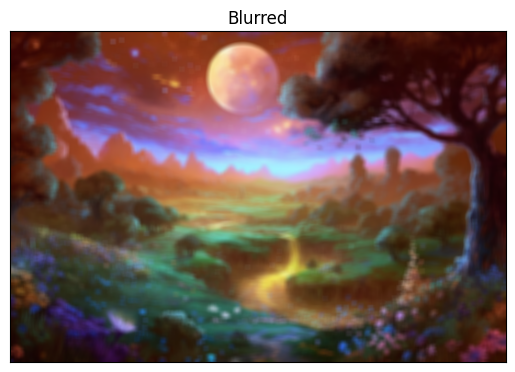

In [ ]:
blur = cv2.blur(input_image ,(6,6))
plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()


## 1.2) Gaussian Blurring




The Gaussian kernel is a 2D matrix representing the shape of the Gaussian distribution. The Gaussian blur filter is a widely used image smoothing technique in image processing and computer vision. It's particularly useful for reducing noise and detail in images. The formula for the 2D Gaussian function is:
$$G(x,y)= \frac{1}{2\pi \sigma^2} e^ {-\frac{x^2+y^2}{2\sigma^2}}$$
where $G(x,y)$ is the value at coordinates $(x,y)$ in the Gaussian kernel and
$\sigma$ is the standard deviation of the Gaussian distribution. Here's the syntax:

<code> blurred_image = cv2.GaussianBlur(image, (kernel_size_x, kernel_size_y), sigma_x, sigma_y)</code>


*   image: The input image.
*   (kernel_size_x, kernel_size_y): The size of the Gaussian kernel. It should be an odd integer.
*   sigma_x: Standard deviation of the Gaussian kernel in the X direction.
*   sigma_y: Standard deviation of the Gaussian kernel in the Y direction.



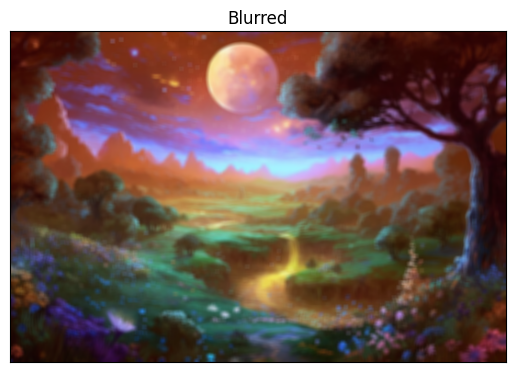

In [ ]:
blur = cv2.GaussianBlur(input_image,(5,5),10,15)
plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## 1.3) Median Blurring






Unlike Gaussian blur, which computes a weighted average of pixel values, median blur replaces each pixel's value with the median value of the pixels in its neighborhood. The formula for median blurring is not as straightforward as a mathematical equation like Gaussian blur because it involves sorting the pixel values in the neighborhood and selecting the median value. Here's a simplified explanation of the process:



1.   Define a square kernel of a specified size (usually an odd number, e.g., 3x3, 5x5, etc.)
2.   Place the kernel at each pixel location in the image.
3.   Extract the pixel values within the kernel's neighborhood.
4.   Sort the pixel values.
5.   Replace the center pixel's value with the median value from the sorted list.

Here's the syntax:
<code> blurred_image = cv2.medianBlur(image, kernel_size)</code>


*   image: The input image.
*   kernel_size: The size of the kernel (an odd integer). It defines the size of the neighborhood for computing the median.



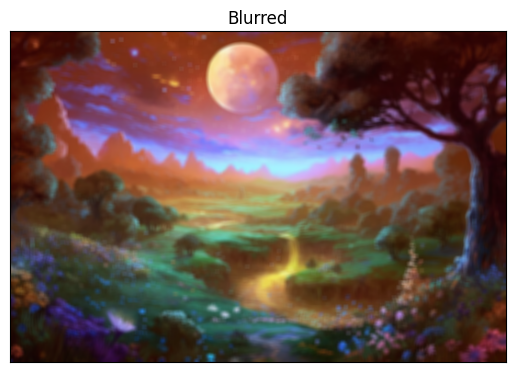

In [ ]:
median = cv2.medianBlur(input_image,5)
plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## 1.4) Bilateral Filtering






A bilateral filter is a non-linear, edge-preserving, and noise-reducing smoothing filter for images. It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels. This weight can be based on a Gaussian distribution.

In [ ]:
blur = cv2.bilateralFilter(input_image,9,75,75)

# **2)  High Pass Filter:**


In the field of Image Processing, Ideal Highpass Filter (IHPF) is used for image sharpening in the frequency domain. Image Sharpening is a technique to enhance the fine details and highlight the edges in a digital image. It removes low-frequency components from an image and preserves high-frequency components. This ideal highpass filter is the reverse operation of the ideal lowpass filter. It can be determined using the following relation-
$$
\mathrm{H}_{H P}(u, v)=1-H_{L P}(u, v)
$$
where $H_{H P}(u, v)$ is the transfer function of the highpass filter and
$H_{L P}(u, v)$ is the transfer function of the corresponding lowpass filter. The transfer function of the IHPF can be specified by the function-
$$
\mathrm{H}(\mathrm{u}, \mathrm{v})= \begin{cases}0 & D(u, v) \leq D_0 \\ 1 & D(u, v)>D_0\end{cases}
$$
Where


*  $D_0$ is a positive constant. IHPF passes all the frequencies outside of a circle of radius $D_0$ from the origin without attenuation and cuts off all the frequencies within the circle.
*  This $D_0$ is the transition point between $\mathrm{H}(\mathrm{u}, \mathrm{v})=1$ and $\mathrm{H}(\mathrm{u}, \mathrm{v})=0$, so this is termed as cutoff frequency.
*  $D(u, v)$ is the Euclidean Distance from any point ( $u, v$ ) to the origin of the frequency plane, i.e,
$$
D(u, v)=\sqrt{\left(u^2+v^2\right)}
$$

# 2.1) Laplacian

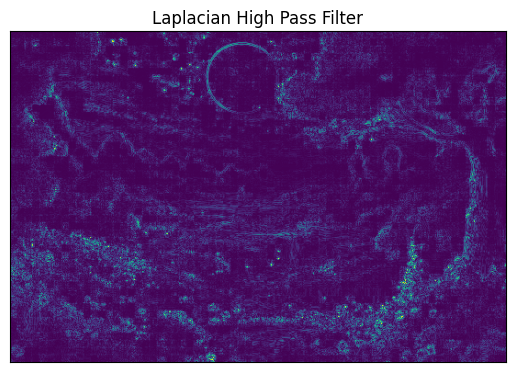

In [ ]:
# Convert the image to grayscale
gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
# Apply Laplacian filter
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
# Convert the result back to uint8
laplacian_high_pass = cv2.convertScaleAbs(laplacian)
plt.imshow(laplacian_high_pass),plt.title('Laplacian High Pass Filter',)
plt.xticks([]), plt.yticks([])
plt.show()

# 2.2) Gaussian

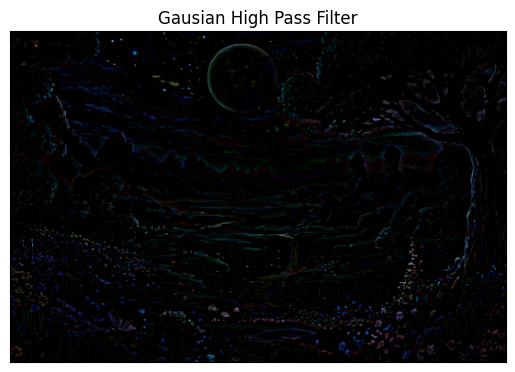

In [ ]:
# Apply Gaussian blur to the image
blurred = cv2.GaussianBlur(input_image, (0, 0), 3)
# Calculate the high-pass filter by subtracting blurred from the original image
gaussian_high_pass = cv2.subtract(input_image, blurred)
plt.imshow(gaussian_high_pass),plt.title('Gausian High Pass Filter',)
plt.xticks([]), plt.yticks([])
plt.show()

# **3) Conclusion**

The word filter comes from frequency-domain processing, where “filtering” refers to the
process of accepting or rejecting certain frequency components

*   **Low pass filter:** smooths an image (retains low-frequency components)

*   **High pass filter:** retains the contours (also called edges) of an image (high frequency)

Especially, on linear filters:

*   **Smoothing filter:** has positive values, sums to 1  preserve brightness of constant regions, removes “high-frequency” components: “low-pass” filter

*   **Derivative filter:** has opposite signs used to get high response in regions of high contrast, sums to 0  no response in constant regions,  highlights “high-frequency” components: “high-pass” filter